# Imports & Configs

In [26]:
# %pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE, SelectFromModel
import itertools
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
import glob
from tqdm import tqdm
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [28]:
# folder_path = 'C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\'

In [29]:
# file_paths = glob.glob(folder_path + '/*.csv')

In [30]:
# train = pd.DataFrame()

In [31]:
# n_file_limit = 1
# for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
#     if n_file_limit <= 0: break
#     n_file_limit -= 1
#     df = pd.read_csv(file_path)
#     train = pd.concat([train, df], ignore_index=True)

# Data Preprocessing & EDA

In [32]:
train = pd.read_csv("C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451498 entries, 0 to 451497
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    451498 non-null  float64
 1   Header_Length    451498 non-null  float64
 2   Protocol Type    451498 non-null  float64
 3   Duration         451498 non-null  float64
 4   Rate             451498 non-null  float64
 5   Srate            451498 non-null  float64
 6   Drate            451498 non-null  float64
 7   fin_flag_number  451498 non-null  float64
 8   syn_flag_number  451498 non-null  float64
 9   rst_flag_number  451498 non-null  float64
 10  psh_flag_number  451498 non-null  float64
 11  ack_flag_number  451498 non-null  float64
 12  ece_flag_number  451498 non-null  float64
 13  cwr_flag_number  451498 non-null  float64
 14  ack_count        451498 non-null  float64
 15  syn_count        451498 non-null  float64
 16  fin_count        451498 non-null  floa

In [34]:
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SYN_Flood
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood


In [35]:
train.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,451498.000000,4.514980e+05,451498.000000,451498.000000,4.514980e+05,4.514980e+05,451498.000000,451498.000000,451498.000000,451498.000000,...,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000
mean,5.715186,7.704312e+04,9.072565,66.337599,9.467058e+03,9.467058e+03,0.000004,0.086344,0.206459,0.090277,...,124.876302,33.381340,124.983505,8.321214e+07,9.499878,13.132842,47.174271,3.085566e+04,0.096250,141.548302
std,260.774301,4.635026e+05,8.966066,13.931429,1.033561e+05,1.033561e+05,0.001329,0.280871,0.404764,0.286579,...,240.858298,160.906349,241.765667,1.704557e+07,0.818956,8.635086,227.590850,3.226507e+05,0.232888,21.063844
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.091460e+00,2.091460e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.571264e+01,1.571264e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312453e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105739,2.877100e+02,14.440000,64.000000,1.184370e+02,1.184370e+02,0.000000,0.000000,0.000000,0.000000,...,54.050113,0.366319,54.060000,8.334400e+07,9.500000,10.396725,0.505921,1.313486e+00,0.080000,141.550000
max,64016.004351,9.785469e+06,47.000000,255.000000,7.340032e+06,7.340032e+06,0.871689,1.000000,1.000000,1.000000,...,8201.774853,7139.980170,8754.000000,1.676394e+08,15.000000,128.078251,10120.787946,5.132515e+07,1.000000,244.600000


In [36]:
train.describe(include='object')

,label
count,451498
unique,34
top,DDoS-ICMP_Flood
freq,69891


## Missing Data

In [37]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [38]:
#Drop rown with NaN values
train = train.dropna()
 
# To reset the indices
train = train.reset_index(drop=True)
 
# Print the dataframe
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


No missing values

## Duplicates 

In [39]:
train.drop_duplicates()
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


## Outliers 

In [40]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

In [41]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='count', ylabel='label'>

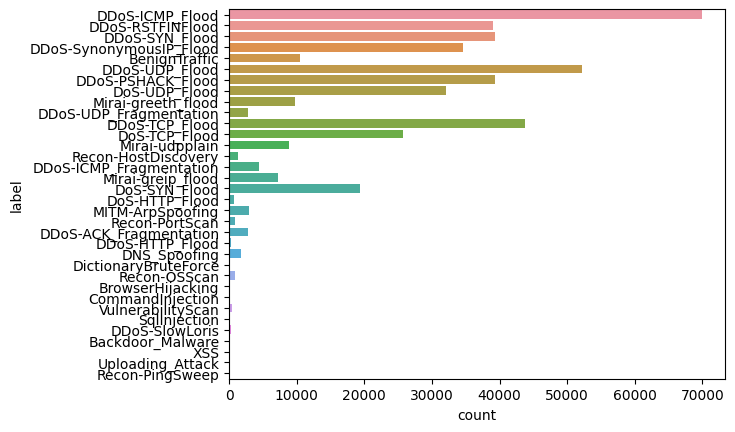

In [42]:
sns.countplot(y=train['label'])

# Classification: 2 (1+1) classes

In [43]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [44]:
labels = ["Attck","Benign"]

In [45]:
new_train = [dict_2classes[k] for k in train['label']]
train['label'] = new_train

<Axes: xlabel='label', ylabel='count'>

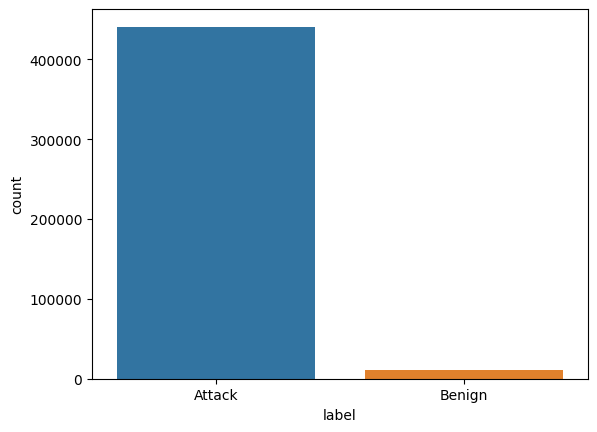

In [46]:
sns.countplot(x=train['label'])

# Label Encoding

In [47]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
# le(test)

In [48]:
# train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,0
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,0


# Feature selection

In [49]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

In [50]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, Y_train)

# with progress bar
with tqdm(total=len(X_train)) as pbar:
    sel.fit(X_train, Y_train)
    pbar.update(len(X_train))
selected_features = X_train.columns[(sel.get_support())]

selected_features

100%|██████████| 451498/451498 [02:01<00:00, 3723.27it/s]


Index(['flow_duration', 'Header_Length', 'Duration', 'Rate', 'Srate',
       'urg_count', 'rst_count', 'Max', 'IAT', 'Number', 'Variance', 'Weight'],
      dtype='object')

In [51]:
X_train = X_train[selected_features]

# Split and scale data

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [53]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

# # with progress bar
# with tqdm(total=len(X_train)) as pbar:
#     X_train = scale.fit_transform(X_train)
#     pbar.update(len(X_train))


x_test = scale.transform(x_test)

In [54]:
evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

# K Nearest Neighbors (KNN) classification model

In [55]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [56]:
study_KNN = optuna.create_study(direction='maximize')
# study_KNN.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_KNN, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_KNN.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_KNN.best_trial)

100%|██████████| 10/10 [24:10<00:00, 145.06s/it]

FrozenTrial(number=7, state=1, values=[0.9911775562938354], datetime_start=datetime.datetime(2023, 11, 11, 22, 24, 5, 958302), datetime_complete=datetime.datetime(2023, 11, 11, 22, 26, 38, 101318), params={'KNN_n_neighbors': 12}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=7, value=None)


In [57]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
# KNN_model.fit(x_train, y_train)

# Training with a progress bar
with tqdm(total=len(X_train)) as pbar:
    KNN_model.fit(x_train, y_train)
    pbar.update(len(X_train))

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

100%|██████████| 451498/451498 [00:03<00:00, 126592.42it/s]


Train Score: 0.9925739128233686
Test Score: 0.9911775562938354


In [58]:
y_pred=KNN_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9911775562938354
Precision: 0.8933202959570266
Recall: 0.9206002522986537
F1 Score: 0.9064765906600842


In [59]:
acc_train=format(accuracy_score(KNN_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, KNN_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,KNN_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,KNN_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(KNN_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, KNN_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,KNN_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,KNN_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['K-Nearest Neighbour',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906


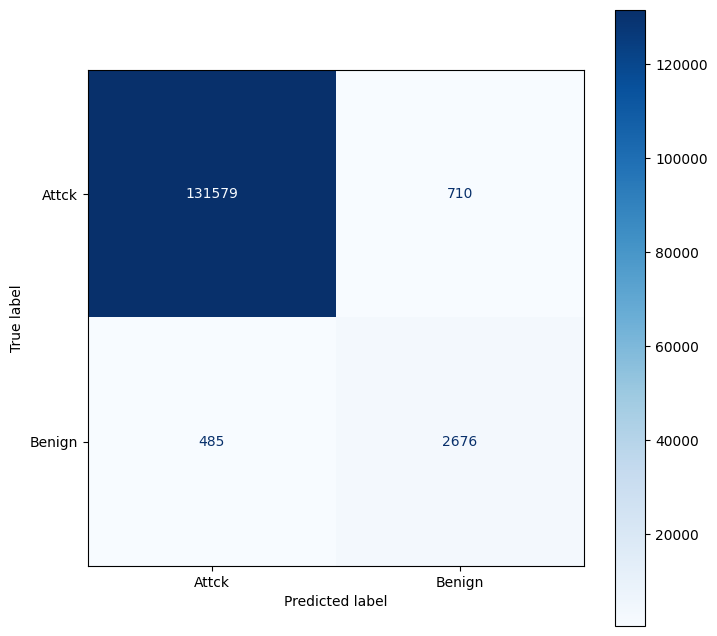

In [60]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=KNN_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

# Logistic Regression Model

In [61]:
lg_model = LogisticRegression(random_state = 42)
# lg_model.fit(x_train, y_train)

# Training with a progress bar
n_iterations = 1  # Adjust this based on your dataset size and needs
with tqdm(total=n_iterations, desc="Training Logistic Regression") as pbar:
    for _ in range(n_iterations):
        lg_model.fit(x_train, y_train)
        pbar.update(1)

Training Logistic Regression: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]


In [62]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.9874386169189491
Test Score: 0.9872203765227021


In [63]:
y_pred=lg_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9872203765227021
Precision: 0.8890579012802111
Recall: 0.8080252820169689
F1 Score: 0.8435782952586919


In [64]:
lg_model.classes_

array([0, 1])

In [65]:
acc_train=format(accuracy_score(lg_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, lg_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,lg_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,lg_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(lg_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, lg_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,lg_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,lg_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


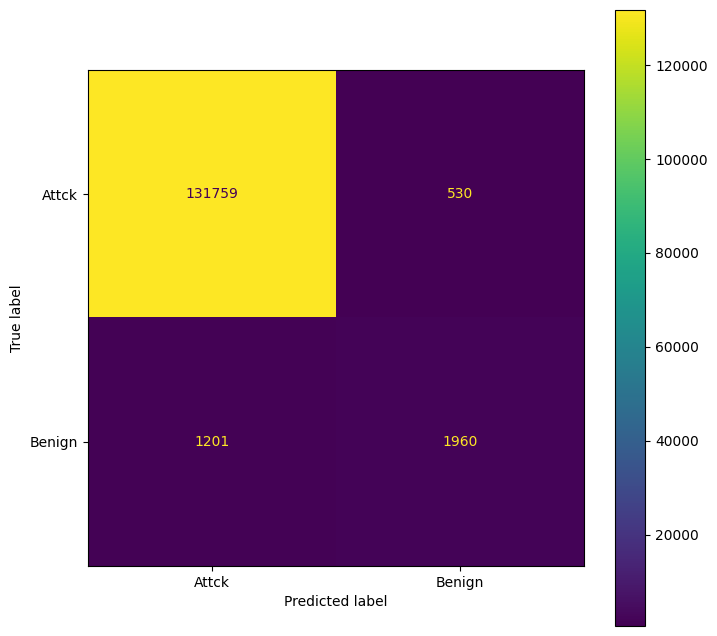

In [66]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=lg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Decision Tree Classifier

In [67]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [68]:
study_dt = optuna.create_study(direction='maximize')
# study_dt.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_dt, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_dt.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_dt.best_trial)

100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

FrozenTrial(number=3, state=1, values=[0.9961757105943152], datetime_start=datetime.datetime(2023, 11, 11, 23, 10, 53, 327826), datetime_complete=datetime.datetime(2023, 11, 11, 23, 10, 53, 829160), params={'dt_max_depth': 14, 'dt_max_features': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=3, value=None)


In [69]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
# dt.fit(x_train, y_train)

# Training with a progress bar
n_iterations = 2  # Adjust this based on your dataset size and needs
with tqdm(total=n_iterations, desc="Training Decision Tree") as pbar:
    for _ in range(n_iterations):
        dt.fit(x_train, y_train)
        pbar.update(1)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Training Decision Tree: 100%|██████████| 2/2 [00:01<00:00,  1.67it/s]

Train Score: 0.9981679997974992
Test Score: 0.9959246954595792


In [70]:
y_pred=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9959246954595792
Precision: 0.9438459714782566
Recall: 0.9701219848755156
F1 Score: 0.9565857924058854


In [71]:
acc_train=format(accuracy_score(dt.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, dt.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,dt.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,dt.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(dt.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, dt.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,dt.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,dt.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


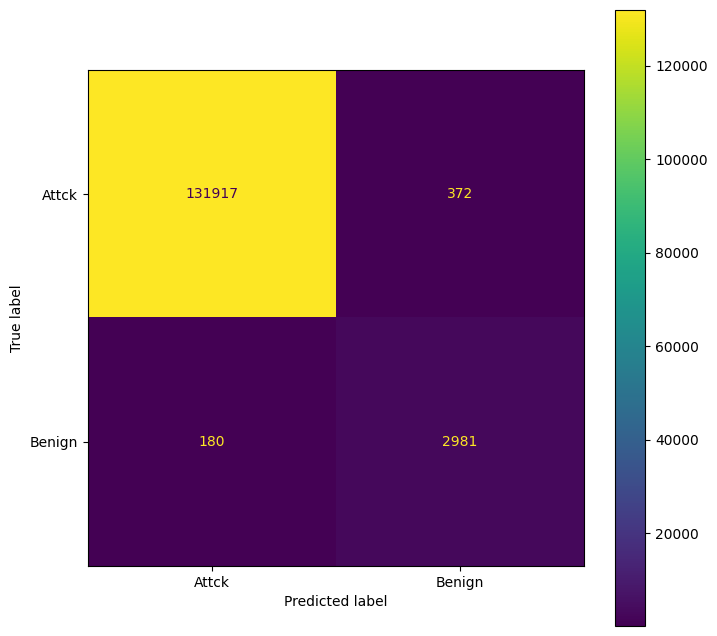

In [72]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

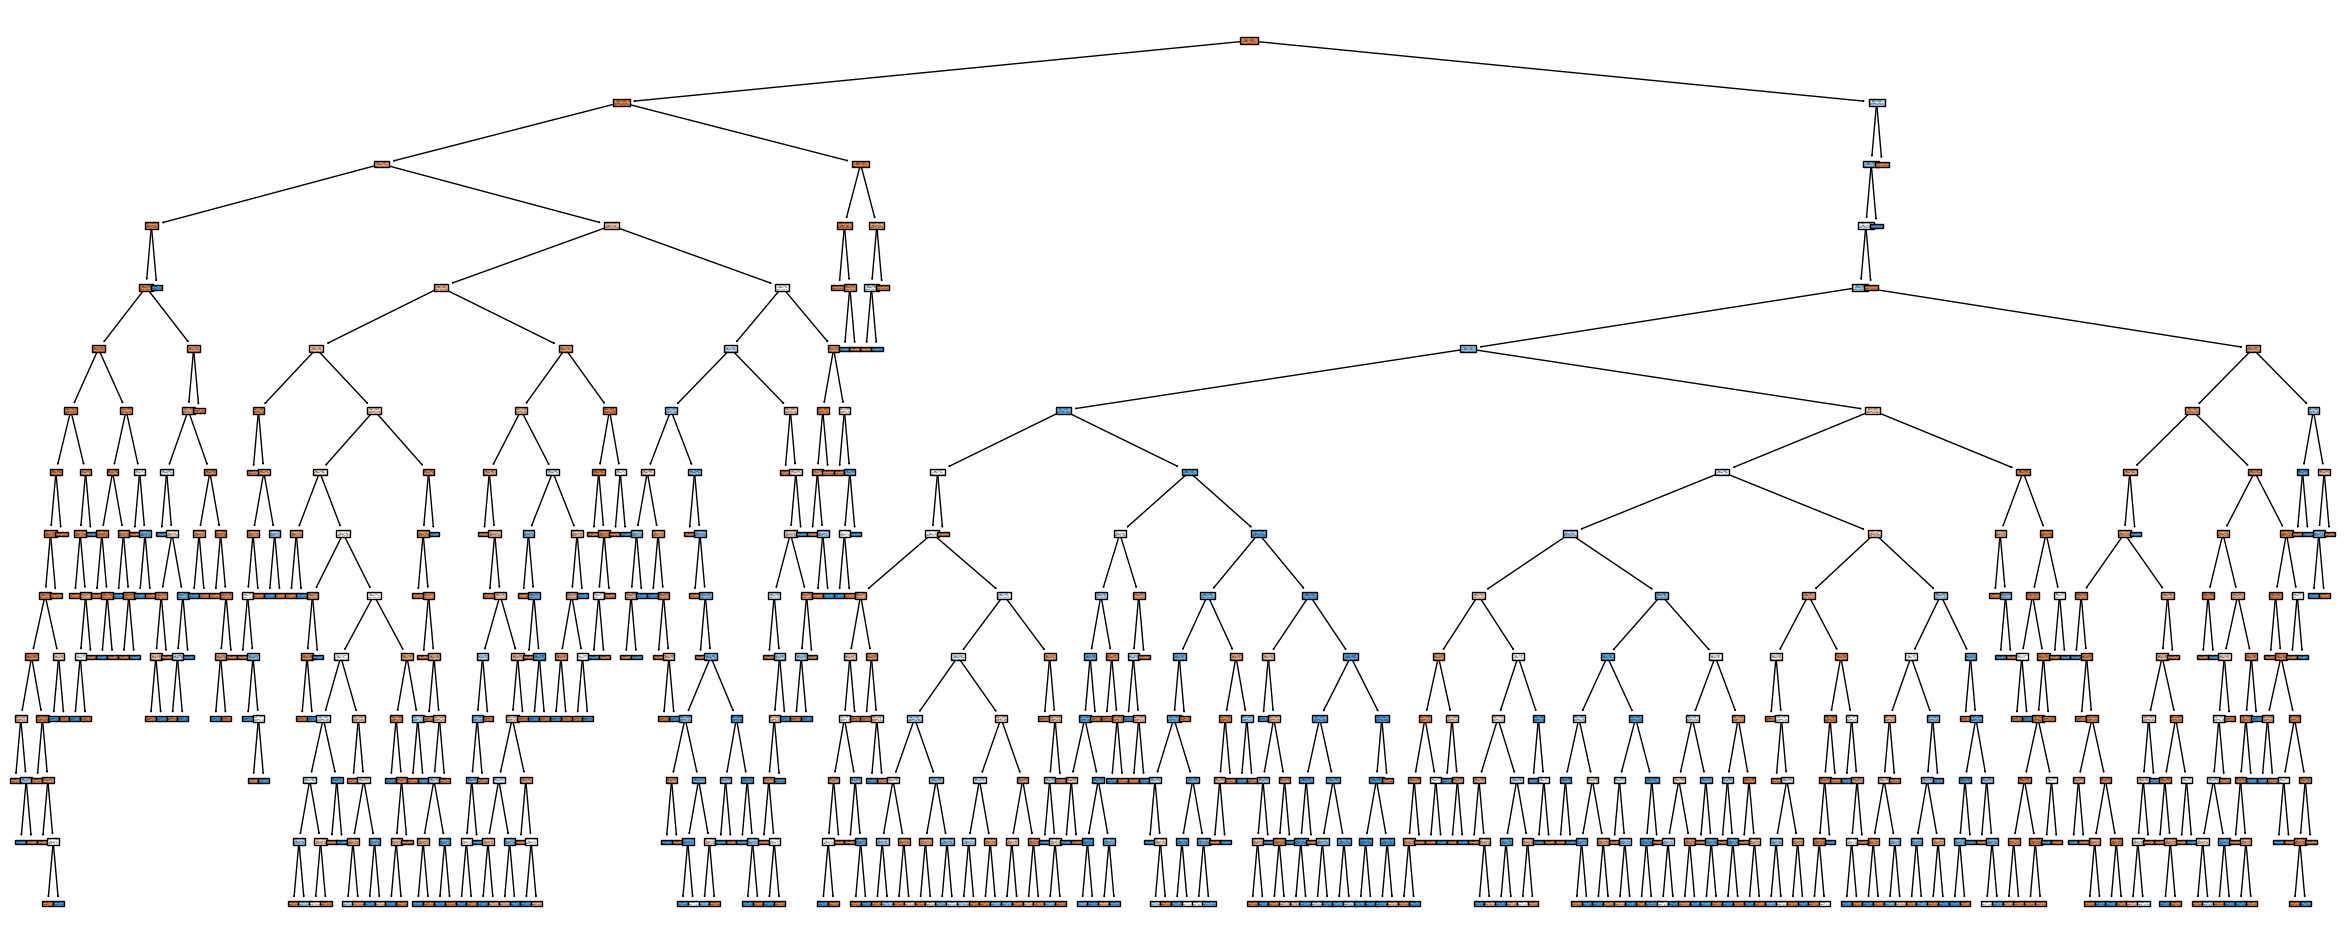

In [73]:
fig = plt.figure(figsize = (30,12))
tree.plot_tree(dt, filled=True);
plt.show()

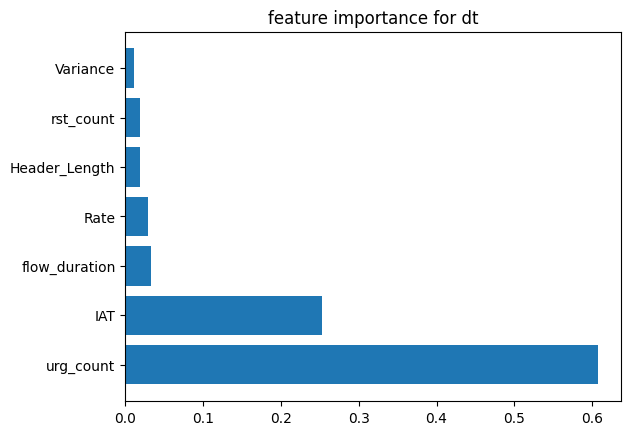

In [74]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [75]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [76]:
study_rf = optuna.create_study(direction='maximize')
# study_rf.optimize(objective, n_trials=10)

# Create a tqdm progress bar
num_trials = 10
with tqdm(total=num_trials) as pbar:
    def callback(study_rf, trial):
        pbar.update(1)

    # Set the callback to update the progress bar
    study_rf.optimize(objective, n_trials=num_trials, callbacks=[callback])

print(study_rf.best_trial)

100%|██████████| 10/10 [00:49<00:00,  4.90s/it]

FrozenTrial(number=2, state=1, values=[0.9966851236618679], datetime_start=datetime.datetime(2023, 11, 11, 23, 11, 26, 781166), datetime_complete=datetime.datetime(2023, 11, 11, 23, 11, 35, 417613), params={'rf_max_depth': 24, 'rf_max_features': 8, 'rf_n_estimators': 12}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=2, value=None)


In [77]:
# rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
# rf.fit(x_train, y_train)

max_features = study_rf.best_trial.params['rf_max_features']
max_depth = study_rf.best_trial.params['rf_max_depth']
n_estimators = study_rf.best_trial.params['rf_n_estimators']
rf = RandomForestClassifier(max_features = max_features, max_depth = max_depth, n_estimators = n_estimators)
def train_random_forest(clf, X_train, y_train):
    clf.fit(x_train, y_train)
# Use a tqdm progress bar to track the number of completed trees
with tqdm(total=n_estimators, desc="Training Random Forest") as pbar:
    train_random_forest(rf, X_train, y_train)
    pbar.update(n_estimators)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Training Random Forest:   0%|          | 0/12 [00:00<?, ?it/s]

Training Random Forest: 100%|██████████| 12/12 [00:08<00:00,  1.43it/s]


Train Score: 0.9996835923657166
Test Score: 0.9967884828349944


In [78]:
y_pred=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9967884828349944
Precision: 0.9622201677693762
Recall: 0.9677850311281875
F1 Score: 0.9649850780003233


In [79]:
acc_train=format(accuracy_score(rf.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, rf.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,rf.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,rf.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(rf.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, rf.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,rf.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,rf.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


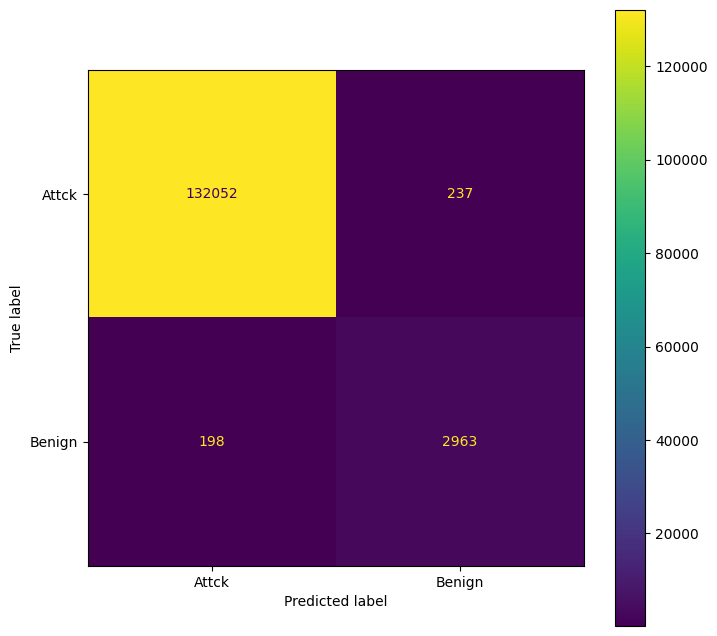

In [80]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

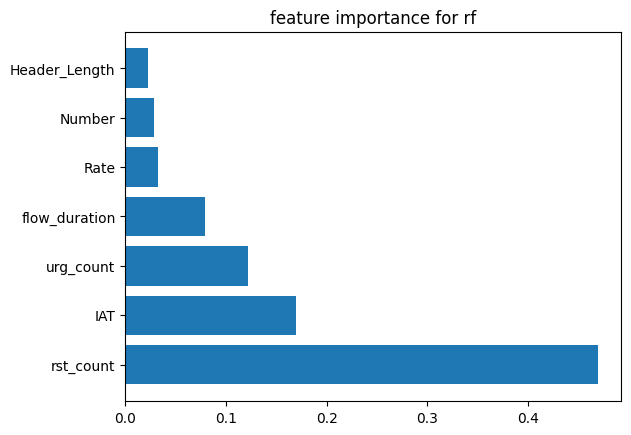

In [81]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for rf')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [82]:
SKGB = GradientBoostingClassifier(random_state=42, verbose= True)
SKGB.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.1012            1.59m
         2           0.0903            1.63m
         3           0.0810            1.66m
         4           0.0744            1.65m
         5           0.0684            1.66m
         6           0.0636            1.63m
         7           0.0588            1.61m
         8           0.0551            1.59m
         9           0.0517            1.58m
        10           0.0486            1.61m
        20           0.0293            1.42m
        30           0.0224            1.20m
        40           0.0192            1.01m
        50           0.0181           50.06s
        60           0.0175           40.16s
        70           0.0169           29.92s
        80           0.0165           19.91s
        90           0.0162            9.93s
       100           0.0159            0.00s


GradientBoostingClassifier(random_state=42, verbose=True)

In [83]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.996646079076596
Test Score: 0.996220007382798


In [84]:
y_pred=SKGB.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.996220007382798
Precision: 0.9514609505960898
Recall: 0.9673396034516274
F1 Score: 0.9592557458102999


In [85]:
acc_train=format(accuracy_score(SKGB.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, SKGB.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,SKGB.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,SKGB.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(SKGB.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, SKGB.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,SKGB.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,SKGB.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Gradient Boosting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


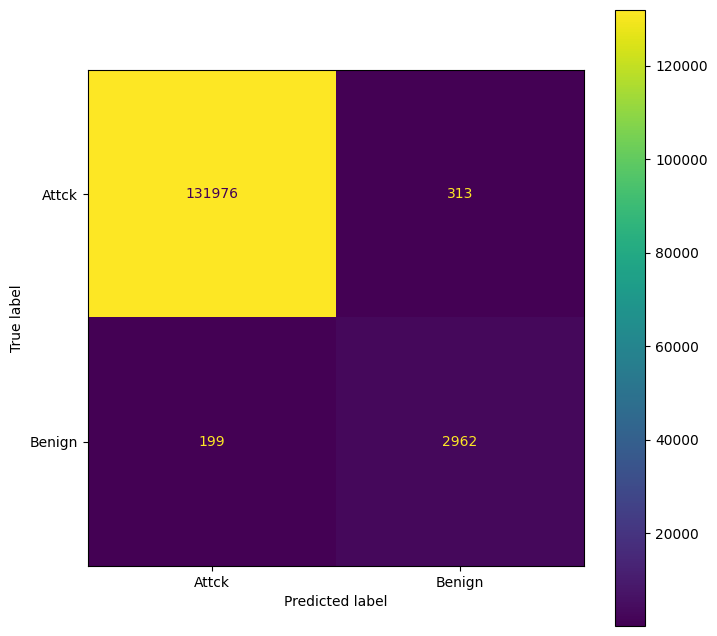

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=SKGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# XGBoost Gradient Boosting Model

In [87]:
## Without Progress bar
# xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(x_train, y_train)



## With Progress bar
# Create an XGBoost classifier
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
xgb_model = XGBClassifier(**params)

# Training with a progress bar
with tqdm(total=params['n_estimators']) as pbar:
    xgb_model.fit(x_train, y_train, eval_metric="mlogloss", verbose=True, eval_set=[(x_test, y_test)])
    pbar.update(params['n_estimators'])
    
# Make predictions
y_pred = xgb_model.predict(x_test)

# Evaluate the classifier
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

  0%|          | 0/100 [00:00<?, ?it/s]

[0]	validation_0-mlogloss:0.95736
[1]	validation_0-mlogloss:0.84043
[2]	validation_0-mlogloss:0.74192
[3]	validation_0-mlogloss:0.65769
[4]	validation_0-mlogloss:0.58493
[5]	validation_0-mlogloss:0.52204
[6]	validation_0-mlogloss:0.46691
[7]	validation_0-mlogloss:0.41862
[8]	validation_0-mlogloss:0.37608
[9]	validation_0-mlogloss:0.33850
[10]	validation_0-mlogloss:0.30524
[11]	validation_0-mlogloss:0.27571
[12]	validation_0-mlogloss:0.24931
[13]	validation_0-mlogloss:0.22580
[14]	validation_0-mlogloss:0.20480
[15]	validation_0-mlogloss:0.18601
[16]	validation_0-mlogloss:0.16918
[17]	validation_0-mlogloss:0.15395
[18]	validation_0-mlogloss:0.14025
[19]	validation_0-mlogloss:0.12794
[20]	validation_0-mlogloss:0.11674
[21]	validation_0-mlogloss:0.10682
[22]	validation_0-mlogloss:0.09773
[23]	validation_0-mlogloss:0.08962
[24]	validation_0-mlogloss:0.08230
[25]	validation_0-mlogloss:0.07570
[26]	validation_0-mlogloss:0.06973
[27]	validation_0-mlogloss:0.06427
[28]	validation_0-mlogloss:0.0

100%|██████████| 100/100 [00:10<00:00,  9.58it/s]

Accuracy: 0.9956589147286822


In [88]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

Training Score: 0.9957949425403736
Test Score: 0.9956589147286822


In [89]:
y_pred=xgb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9956589147286822
Precision: 0.9439034421847406
Recall: 0.963346797052705
F1 Score: 0.9534055265239271


In [90]:
acc_train=format(accuracy_score(xgb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, xgb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,xgb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,xgb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(xgb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, xgb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,xgb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,xgb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBoosting Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


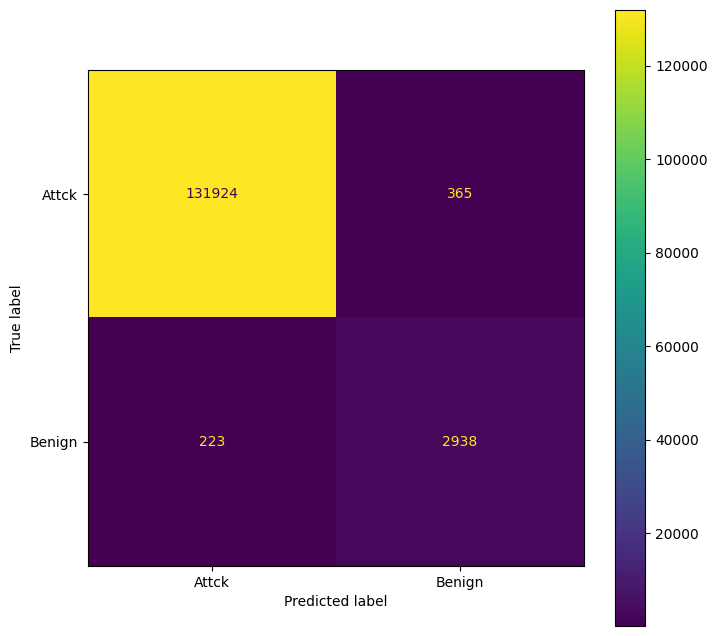

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Light Gradient Boosting Model

In [92]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 7346, number of negative: 308702
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2517
[LightGBM] [Info] Number of data points in the train set: 316048, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.023243 -> initscore=-3.738220
[LightGBM] [Info] Start training from score -3.738220


LGBMClassifier(random_state=42)

In [93]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

Training Score: 0.9978104591707588
Test Score: 0.9962126245847176


In [94]:
y_pred=lgb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='macro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='macro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='macro'))

Accuracy: 0.9962126245847176
Precision: 0.9493113364613289
Recall: 0.9699605930454396
F1 Score: 0.9593915987165691


In [95]:
acc_train=format(accuracy_score(lgb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, lgb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,lgb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,lgb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(lgb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, lgb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,lgb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,lgb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['light GBM',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
6,light GBM,0.998,0.968,0.984,0.976,0.996,0.949,0.970,0.959
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


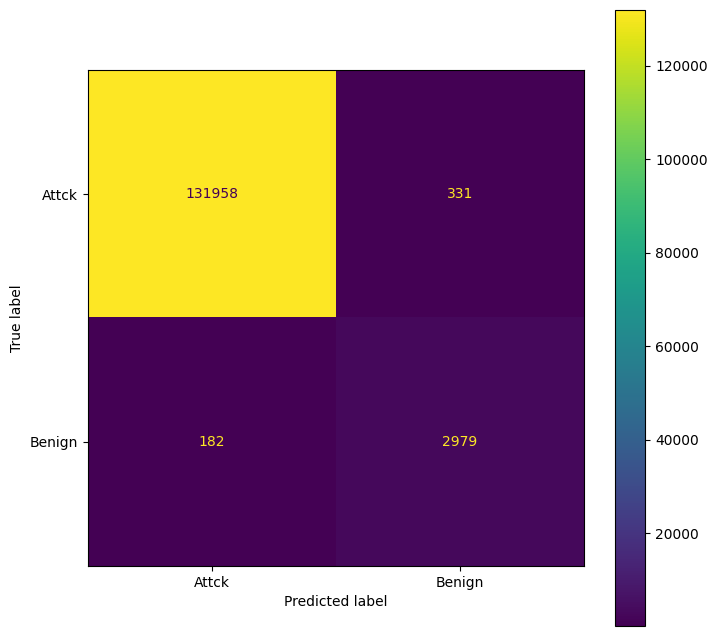

In [96]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=lgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# SKLearn AdaBoost Model

In [97]:
ab_model = AdaBoostClassifier(random_state=42)

In [98]:
ab_model.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [99]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

Training Score: 0.996111350174657
Test Score: 0.9956958287190846


In [100]:
y_pred=ab_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

Accuracy: 0.9956958287190846
Precision: 0.9956958287190846
Recall: 0.9956958287190846
F1 Score: 0.9956958287190846


In [101]:
acc_train=format(accuracy_score(ab_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, ab_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,ab_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,ab_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(ab_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, ab_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,ab_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,ab_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
6,light GBM,0.998,0.968,0.984,0.976,0.996,0.949,0.970,0.959
7,AdaBoost Classifier,0.996,0.948,0.969,0.958,0.996,0.942,0.967,0.954
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


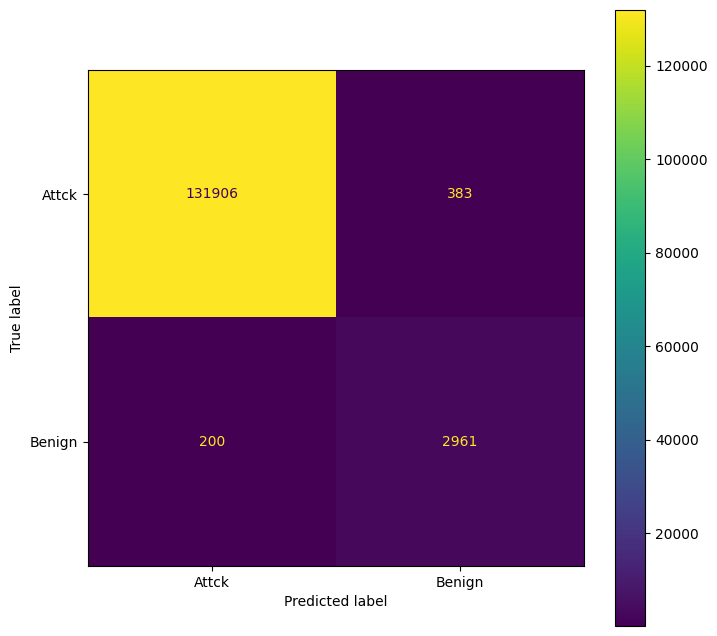

In [102]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=ab_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# CatBoost Classifier Model

In [103]:
cb_model = CatBoostClassifier(verbose=1)

In [104]:
cb_model.fit(x_train, y_train)

Learning rate set to 0.120317
0:	learn: 0.4018578	total: 207ms	remaining: 3m 26s
1:	learn: 0.2109838	total: 257ms	remaining: 2m 8s
2:	learn: 0.0857594	total: 313ms	remaining: 1m 44s
3:	learn: 0.0413613	total: 371ms	remaining: 1m 32s
4:	learn: 0.0251672	total: 456ms	remaining: 1m 30s
5:	learn: 0.0186944	total: 519ms	remaining: 1m 25s
6:	learn: 0.0170272	total: 583ms	remaining: 1m 22s
7:	learn: 0.0159776	total: 638ms	remaining: 1m 19s
8:	learn: 0.0143380	total: 707ms	remaining: 1m 17s
9:	learn: 0.0137440	total: 757ms	remaining: 1m 14s
10:	learn: 0.0132238	total: 804ms	remaining: 1m 12s
11:	learn: 0.0129116	total: 863ms	remaining: 1m 11s
12:	learn: 0.0126332	total: 915ms	remaining: 1m 9s
13:	learn: 0.0123153	total: 972ms	remaining: 1m 8s
14:	learn: 0.0121608	total: 1.02s	remaining: 1m 6s
15:	learn: 0.0117878	total: 1.07s	remaining: 1m 5s
16:	learn: 0.0116278	total: 1.13s	remaining: 1m 5s
17:	learn: 0.0114464	total: 1.2s	remaining: 1m 5s
18:	learn: 0.0112994	total: 1.28s	remaining: 1m 6s
1

In [105]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

Training Score: 0.9994937477851465
Test Score: 0.9960354374307863


In [106]:
y_pred=cb_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

Accuracy: 0.9960354374307863
Precision: 0.9960354374307863
Recall: 0.9960354374307863
F1 Score: 0.9960354374307863


In [107]:
acc_train=format(accuracy_score(cb_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, cb_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,cb_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,cb_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(cb_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, cb_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,cb_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,cb_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CatBoost Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
6,light GBM,0.998,0.968,0.984,0.976,0.996,0.949,0.970,0.959
7,AdaBoost Classifier,0.996,0.948,0.969,0.958,0.996,0.942,0.967,0.954
8,CatBoost Classifier,0.999,0.991,0.998,0.994,0.996,0.948,0.968,0.957
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844


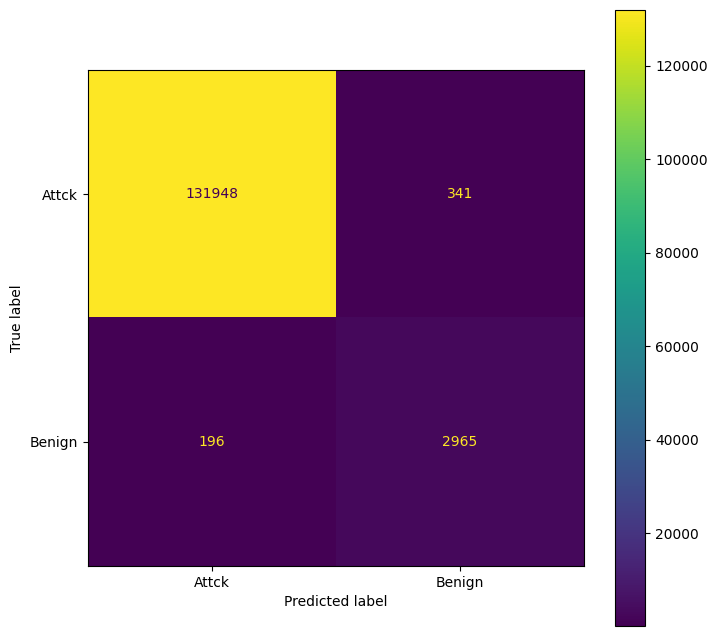

In [108]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=cb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

# Naive Baye Model

## Bernoulli Naive Bayes

In [109]:
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)

BernoulliNB()

In [110]:
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)

print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.982654533488584
Test Score: 0.9825692137320045


In [111]:
y_pred=BNB_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

Accuracy: 0.9825692137320045
Precision: 0.9825692137320045
Recall: 0.9825692137320045
F1 Score: 0.9825692137320045


In [112]:
acc_train=format(accuracy_score(BNB_model.predict(x_train), y_train),'.3f')
precision_train=format(precision_score(y_train, BNB_model.predict(x_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,BNB_model.predict(x_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,BNB_model.predict(x_train), average='macro'),'.3f')


acc_test=format(accuracy_score(BNB_model.predict(x_test), y_test),'.3f')
precision_test=format(precision_score(y_test, BNB_model.predict(x_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,BNB_model.predict(x_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,BNB_model.predict(x_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
6,light GBM,0.998,0.968,0.984,0.976,0.996,0.949,0.970,0.959
7,AdaBoost Classifier,0.996,0.948,0.969,0.958,0.996,0.942,0.967,0.954
8,CatBoost Classifier,0.999,0.991,0.998,0.994,0.996,0.948,0.968,0.957
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844
9,Naive Bayes,0.983,0.788,0.967,0.854,0.983,0.788,0.967,0.855


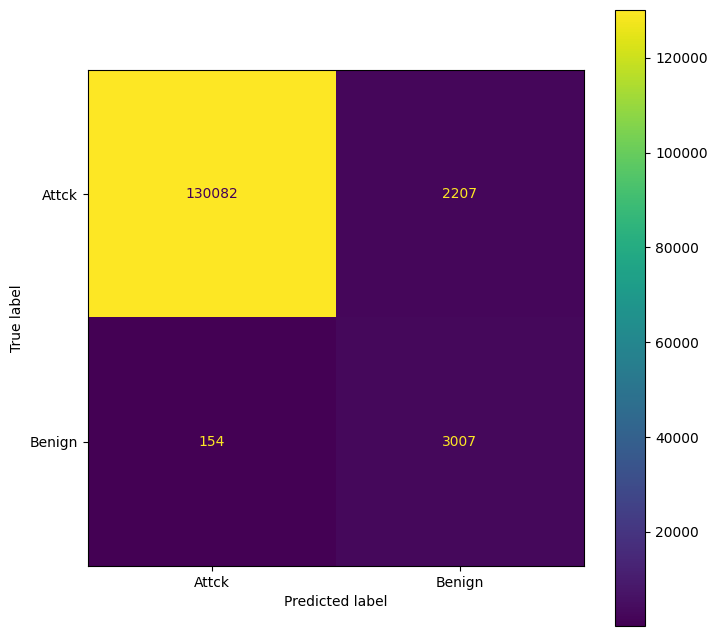

In [113]:
fig, ax = plt.subplots(figsize=(8,8))
cm = confusion_matrix(y_test,y_pred,labels=BNB_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot(ax=ax)
plt.show()

## Gaussian Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
# Create a Multinomial Naive Bayes classifier
GNB_model = GaussianNB()
# GNB_model.fit(x_train, y_train)

# Define the number of iterations (you can adjust this based on your dataset)
n_iterations = 10
# Training with a progress bar
with tqdm(total=n_iterations, desc="Training Bernoulli Naive Bayes") as pbar:
    for _ in range(n_iterations):
        GNB_model.fit(x_train, y_train)
        pbar.update(1)

GNB_train, GNB_test = GNB_model.score(x_train , y_train), GNB_model.score(x_test , y_test)

print(f"Training Score: {GNB_train}")
print(f"Test Score: {GNB_test}")

Training Bernoulli Naive Bayes: 100%|██████████| 10/10 [00:01<00:00,  9.69it/s]


Training Score: 0.9541683541740495
Test Score: 0.9546105574012551


# Voting Model 

In [115]:
# v_clf = VotingClassifier(estimators=[('KNeighborsClassifier', KNN_model), ("XGBClassifier", xgb_model), ("RandomForestClassifier", rf), ("DecisionTree", dt), ("XGBoost", xgb_model), ("LightGB", lgb_model), ("AdaBoost", ab_model), ("Catboost", cb_model)], voting = "hard")

In [116]:
# v_clf.fit(x_train, y_train)

In [117]:
# voting_train, voting_test = v_clf.score(x_train , y_train), v_clf.score(x_test , y_test)

# print(f"Training Score: {voting_train}")
# print(f"Test Score: {voting_test}")

# SVM Model

In [118]:
# def objective(trial):
#     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
#     c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
#     if kernel in ['linear', 'rbf']:
#         classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
#     elif kernel == 'linearSVC':
#         classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
#     elif kernel == 'poly':
#         degree = trial.suggest_int('degree', 2, 10)
#         classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
#     accuracy = classifier_obj.score(x_test, y_test)
#     return accuracy

In [119]:
# study_svm = optuna.create_study(direction='maximize')
# study_svm.optimize(objective, n_trials=10)
# print(study_svm.best_trial)

In [120]:
# if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
#     SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
# elif kernel == 'linearSVC':
#     SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
# elif kernel == 'poly':
#     SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

# SVM_model.fit(x_train, y_train)

In [121]:
# SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

# print(f"Training Score: {SVM_train}")
# print(f"Test Score: {SVM_test}")

In [122]:
# y_pred=SVM_model.predict(x_test)
# print("Accuracy:",accuracy_score(y_test, y_pred.round()))
# print("Precision:",precision_score(y_test, y_pred.round(),average='micro'))
# print("Recall:",recall_score(y_test, y_pred.round(),average='micro'))
# print("F1 Score:",f1_score(y_test, y_pred.round(),average='micro'))

In [123]:
# acc_train=format(accuracy_score(SVM_model.predict(x_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, SVM_model.predict(x_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,SVM_model.predict(x_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,SVM_model.predict(x_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(SVM_model.predict(x_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, SVM_model.predict(x_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,SVM_model.predict(x_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,SVM_model.predict(x_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Support Vector Machine',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

In [124]:
# fig, ax = plt.subplots(figsize=(8,8))
# cm = confusion_matrix(y_test,y_pred,labels=SVM_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
# disp.plot(ax=ax)
# plt.show()

# ANN

In [125]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=34, activation='softmax'))
ann.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [126]:
history1= ann.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=20)

Epoch 1/20
9877/9877 [==============================] - 19s 2ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.0193 - val_accuracy: 0.9914
Epoch 2/20
9877/9877 [==============================] - 20s 2ms/step - loss: 0.0184 - accuracy: 0.9918 - val_loss: 0.0190 - val_accuracy: 0.9915
Epoch 3/20
9877/9877 [==============================] - 19s 2ms/step - loss: 0.0177 - accuracy: 0.9924 - val_loss: 0.0181 - val_accuracy: 0.9920
Epoch 4/20
9877/9877 [==============================] - 18s 2ms/step - loss: 0.0171 - accuracy: 0.9925 - val_loss: 0.0179 - val_accuracy: 0.9919
Epoch 5/20
9877/9877 [==============================] - 18s 2ms/step - loss: 0.0168 - accuracy: 0.9927 - val_loss: 0.0175 - val_accuracy: 0.9922
Epoch 6/20
9877/9877 [==============================] - 19s 2ms/step - loss: 0.0166 - accuracy: 0.9928 - val_loss: 0.0172 - val_accuracy: 0.9923
Epoch 7/20
9877/9877 [==============================] - 17s 2ms/step - loss: 0.0168 - accuracy: 0.9929 - val_loss: 0.0176 - val_ac

In [127]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 34)                2210      
                                                                 
Total params: 7202 (28.13 KB)
Trainable params: 7202 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
ann.evaluate(x=x_test, y=y_test, batch_size=8)

    1/16932 [..............................] - ETA: 12:04 - loss: 0.0000e+00 - accuracy: 1.0000

16932/16932 [==============================] - 18s 1ms/step - loss: 0.0163 - accuracy: 0.9928


[0.01632687635719776, 0.9928165078163147]

In [129]:
print(ann.evaluate(x_train, y_train))

9877/9877 [==============================] - 13s 1ms/step - loss: 0.0152 - accuracy: 0.9934
[0.015186845324933529, 0.9934092164039612]


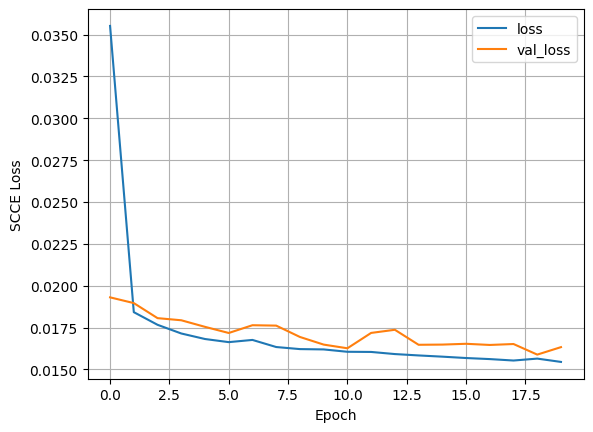

In [130]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

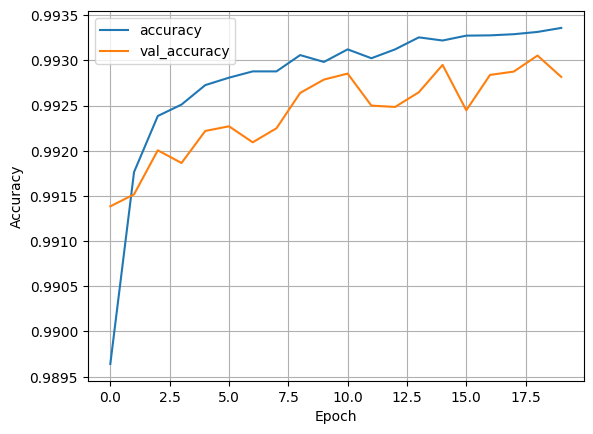

In [131]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

## Training Curve

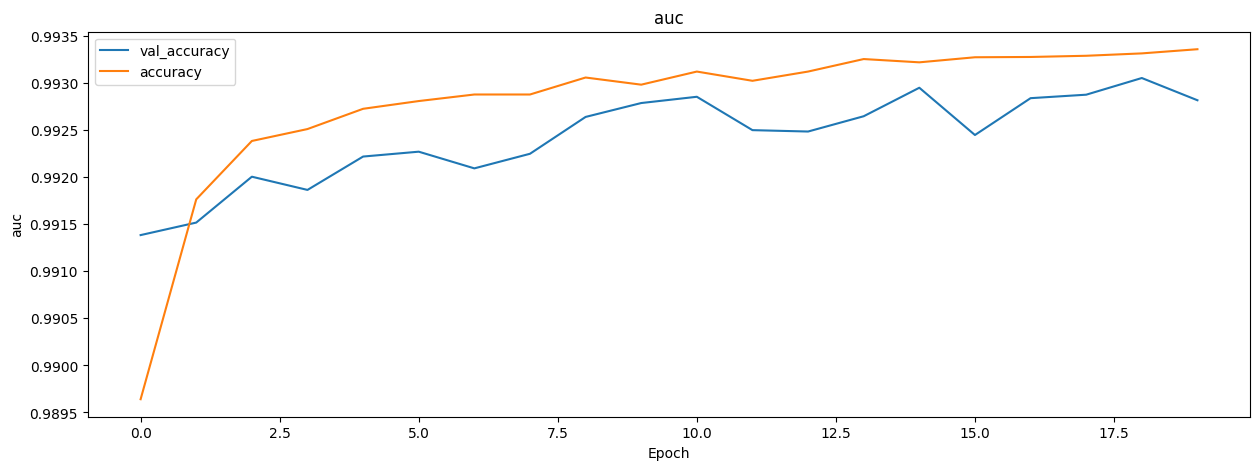

In [132]:
plt.figure(figsize=(15,5))
plt.plot(range(history1.epoch[-1]+1),history1.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history1.epoch[-1]+1),history1.history['accuracy'],label='accuracy')
plt.title('auc'); plt.xlabel('Epoch'); plt.ylabel('auc');plt.legend(); 
plt.show()

## Generate ROC Curve

In [133]:
y_pred = ann.predict(x_test)

print(y_pred.shape)
for i in range (33):
    y_pred=np.delete(y_pred,0,1)
print(y_pred.shape)
y_pred=np.squeeze(y_pred,1)
print(y_pred.shape)

4233/4233 [==============================] - 4s 958us/step
(135450, 34)
(135450, 1)
(135450,)


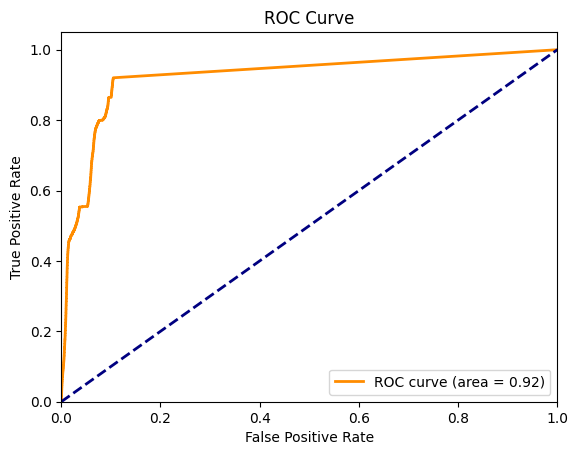

In [134]:
from sklearn.metrics import roc_curve, auc

def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
generate_results(y_test, y_pred)

# Summary

In [135]:
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test], 
        ["XGBM", xgb_train, xgb_test], 
        ["Adaboost", ab_train, ab_test], 
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test], 
        ["Naive Baye Model", BNB_train, BNB_test], 
#         ["Voting", voting_train, voting_test],
        # ["SVM", SVM_train, SVM_test]
        ]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.992574 │     0.991178 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.987439 │     0.98722  │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      0.998168 │     0.995925 │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      0.999684 │     0.996788 │
├─────────────────────┼───────────────┼──────────────┤
│ GBM                 │      0.996646 │     0.99622  │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      0.995795 │     0.995659 │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      0.996111 │     0.995696 │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      0.99781  │     0.996213 │
├─────────

# Final Evaluation Table for (1+1) Classes

In [136]:
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
3,Random Forest,1.000,0.995,0.998,0.997,0.997,0.962,0.968,0.965
2,Decision Tree,0.998,0.970,0.991,0.980,0.996,0.944,0.970,0.957
4,Gradient Boosting Classifier,0.997,0.958,0.969,0.963,0.996,0.951,0.967,0.959
5,XGBoosting Classifier,0.996,0.948,0.962,0.954,0.996,0.944,0.963,0.953
6,light GBM,0.998,0.968,0.984,0.976,0.996,0.949,0.970,0.959
7,AdaBoost Classifier,0.996,0.948,0.969,0.958,0.996,0.942,0.967,0.954
8,CatBoost Classifier,0.999,0.991,0.998,0.994,0.996,0.948,0.968,0.957
0,K-Nearest Neighbour,0.993,0.908,0.934,0.921,0.991,0.893,0.921,0.906
1,Logistic Regression,0.987,0.893,0.807,0.845,0.987,0.889,0.808,0.844
9,Naive Bayes,0.983,0.788,0.967,0.854,0.983,0.788,0.967,0.855
